#### Energy minimizations and Hessians

Quantum chemistry calculations are a complicated and computationally expensive ordeal, however it is often useful to know what happens in the background.

Before we even start with frequency calculation, it is necessary to ensure we have obtained an equilibrium structure for our molecule.\
Geometry optimization is, on paper, a simple problem. We are trying to find a local minimum of energy, which is given as a function of positions, $E(r)$. 


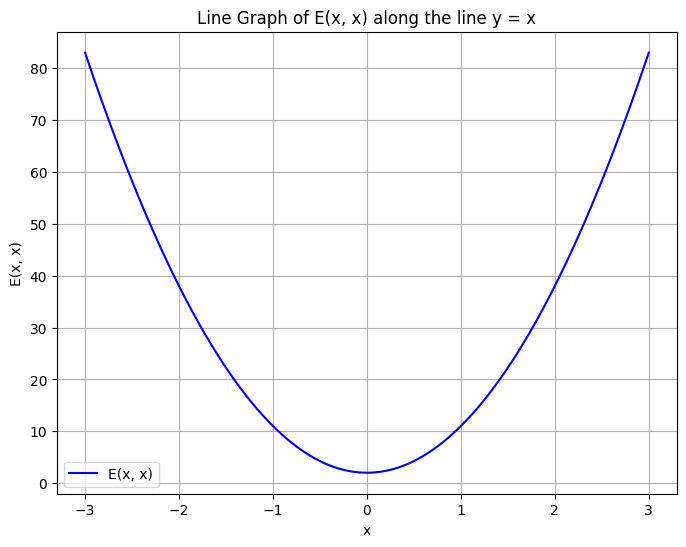

In [4]:
# For the line graph, we'll plot the function along a line in the 2D space.
# Let's choose the line y = x for simplicity, and plot E(x, x) over a range of x values.

# Define the range of x values
x_line = np.linspace(-3, 3, 400)
# Calculate E(x, x)
z_line = E(x_line, x_line)

# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(x_line, z_line, label='E(x, x)', color='blue')
plt.xlabel('x')
plt.ylabel('E(x, x)')
plt.title('Line Graph of E(x, x) along the line y = x')
plt.grid(True)
plt.legend()
plt.show()


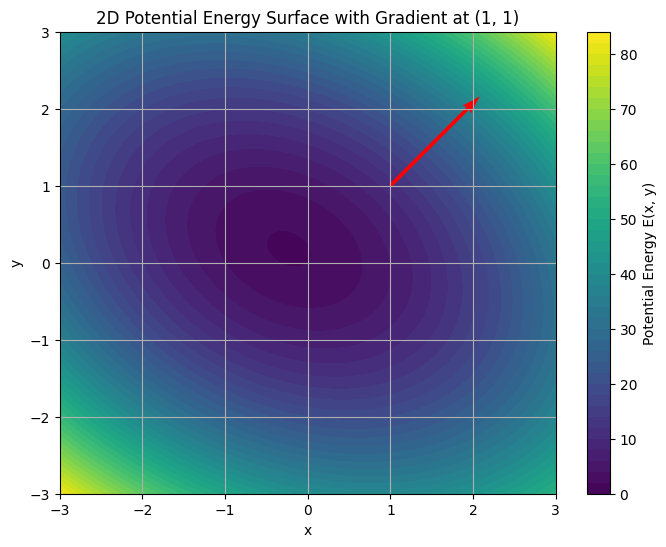

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def E(x, y):
    return 3*x**2 + 4*y**2 + 2*x*y + x - y + 2

def grad_E(x, y):
    return np.array([6*x + 2*y + 1, 8*y + 2*x - 1])

# Create a grid of x, y values
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
x, y = np.meshgrid(x, y)
z = E(x, y)

# Calculate the gradient at point (1, 1)
grad_at_point = grad_E(1, 1)

# Create the plot
plt.figure(figsize=(8, 6))
plt.contourf(x, y, z, levels=50, cmap='viridis')
plt.colorbar(label='Potential Energy E(x, y)')
plt.quiver(1, 1, grad_at_point[0], grad_at_point[1], color='red', scale=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Potential Energy Surface with Gradient at (1, 1)')
plt.grid(True)
plt.show()


For posterity we can also show a three dimensional case. Let us have an arbitrary quadratic function of three variables standing in as a potential energy surface:

$E(x,y,z)=2x^2+3y^2+3z^2+xy-2xz+4yz+2x+y+1$

(Plotted below for literally no reason)

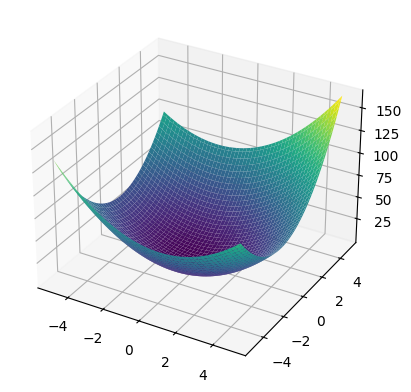

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def E(x, y, z):
    return 2*x**2 + 3*y**2 + 3*z**2 + x*y - 2*x*z + 4*y*z + 2*x + y + 1

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = np.linspace(-5, 5, 100)

# 3D plots need a (x,y) meshgrid as basis
X, Y = np.meshgrid(x, y)
Z = E(X, Y, 0)  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()


Gradient **g** of this function at the point $(x_0,y_0,z_0)$

$\nabla E = \big( \frac{\partial E}{\partial x}, \frac{\partial E}{\partial y}, \frac{\partial E}{\partial z} \big)$

$\frac{\partial E}{\partial x}=4x+y-2z+2 $

$\frac{\partial E}{\partial y}=x+6y+4z+1 $

$\frac{\partial E}{\partial z}=-2x+4y+6z $

$\nabla E(x,y,z)=(4x+y-2z+2,x+6y+4z+1,-2x+4y+6z)$

So for instance for a point $(1,1,1)$

$\nabla E(1,1,1)=(5,12,8)$

Hessian matrix **H**\
Hessian matrix is a square matrix of second-order partial derivates of a scalar function, whose determinant is called Hessian. Generally the Hessian matrix is used to determine function extrema, thus finds its use in quantum chemistry - characterizing extrema and curvature of the potential energy surface. 

#### Frequency calculations